<a href="https://colab.research.google.com/github/jscriven0218/NTL-DS-Phase-1-Project-Template/blob/main/GettingIntoFlight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Getting Into Flight**

# Business Understanding


Expanding into a new industry, like flight, is exciting!  With the proper research, we can run a safe and profitable aviation division that will take our company to new heights.

# Data Understanding

The National Transportation Safety Board collected aviation accident data from 1948 to 2022.  This data not only provides information on the flight, such as the plane and weather conditions, but also on the acccident itself with records on injuries and the condition of the plane post-accident. With 60+ years of descriptive information at our hands, we need to determine which airplanes are going to give us the best chance at accomplishing our goal of expanding our business.


Because this data concentrates on the accidents and ignores successful flights, we will focus our attention on determining how to keep the outcome of the accidents to a minimum, meaning little to no injuries and minor aircraft damage.

In [3]:
import pandas as pd
import numpy as np
aviation = pd.read_csv('Aviation_Data.csv')
aviation.info()


<ipython-input-3-9b0a96dc3108>:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation = pd.read_csv('Aviation_Data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [4]:
aviation['Event.Date'] = pd.to_datetime(aviation['Event.Date'])
datemin = aviation['Event.Date'].min()
datemax = aviation['Event.Date'].max()
print(datemin)
print(datemax)

1948-10-24 00:00:00
2022-12-29 00:00:00


## Data Preparation

Of the rows of data, we wanted to look only at those accidents or incidents regarding airplanes.  About 31% of the recorded data has an aircraft category listed, bringing our total incidents to analyze to just over 27,600.

In [5]:
#dropping any rows that do not have to do with events (accidents or incidents) occuring in airplanes
aviation.dropna(subset = ['Event.Id'],inplace = True)
aviation = aviation[aviation['Aircraft.Category'] == 'Airplane']
#drop any unncessary columns
aviation.drop(columns = ['Accident.Number','Location','Latitude','Longitude','Airport.Code','Airport.Name','Schedule'],inplace = True)
#replacing blanks with unknowns
aviation['Weather.Condition'] = aviation['Weather.Condition'].fillna('UNK')
aviation['Number.of.Engines'] = aviation['Number.of.Engines'].fillna('Unknown')
aviation['Amateur.Built'] = aviation['Amateur.Built'].fillna('Unknown')
aviation['Aircraft.damage'] = aviation['Aircraft.damage'].fillna('Unknown')
aviation['Make'] = aviation['Make'].fillna('')
#format make column the same, all caps
aviation['Make'] = aviation['Make'].str.upper()
#adding columns of total injured (fatal, serious or minor) and total in plane
aviation['Total.Fatal.Injuries'] = aviation['Total.Fatal.Injuries'].fillna(0)
aviation['Total.Serious.Injuries'] = aviation['Total.Serious.Injuries'].fillna(0)
aviation['Total.Minor.Injuries'] = aviation['Total.Minor.Injuries'].fillna(0)
aviation['Total.Uninjured'] = aviation['Total.Uninjured'].fillna(0)
aviation['Total.Injuries'] = aviation['Total.Fatal.Injuries'] + aviation['Total.Serious.Injuries'] + aviation['Total.Minor.Injuries']
aviation['Total.Passengers'] = aviation['Total.Injuries'] + aviation['Total.Uninjured']
aviation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27617 entries, 5 to 90345
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                27617 non-null  object        
 1   Investigation.Type      27617 non-null  object        
 2   Event.Date              27617 non-null  datetime64[ns]
 3   Country                 27610 non-null  object        
 4   Injury.Severity         26803 non-null  object        
 5   Aircraft.damage         27617 non-null  object        
 6   Aircraft.Category       27617 non-null  object        
 7   Registration.Number     27382 non-null  object        
 8   Make                    27617 non-null  object        
 9   Model                   27586 non-null  object        
 10  Amateur.Built           27617 non-null  object        
 11  Number.of.Engines       27617 non-null  object        
 12  Engine.Type             23391 non-null  object     

<ipython-input-5-6245d23c201c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation.drop(columns = ['Accident.Number','Location','Latitude','Longitude','Airport.Code','Airport.Name','Schedule'],inplace = True)
<ipython-input-5-6245d23c201c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation['Weather.Condition'] = aviation['Weather.Condition'].fillna('UNK')
<ipython-input-5-6245d23c201c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [6]:
aviation['Make'].value_counts()

,count
Make,
CESSNA,8475
PIPER,4715
BEECH,1692
BOEING,1324
MOONEY,419
...,...
RAMMEL THOMAS W,1
HEMMER,1
W.H. HUNNICUTT,1


In [7]:
aviation.loc[aviation['Make'].str.contains('cessna', case=False),'Make']='CESSNA'
aviation.loc[aviation['Make'].str.contains('piper', case=False),'Make']='PIPER'
aviation.loc[aviation['Make'].str.contains('beech', case=False),'Make']='BEECH'
aviation.loc[aviation['Make'].str.contains('boeing', case=False),'Make']='BOEING'
aviation.loc[aviation['Make'].str.contains('mooney', case=False),'Make']='MOONEY'

In [8]:
aviation['Make'].value_counts()

,count
Make,
CESSNA,8533
PIPER,4785
BEECH,1768
BOEING,1353
MOONEY,467
...,...
GLINES,1
RAMMEL THOMAS W,1
HEMMER,1


In [9]:
#save clean data
aviation.to_csv('Aviation_Clean.csv')

# Exploratory Data Analysis

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27617 entries, 5 to 90345
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                27617 non-null  object        
 1   Investigation.Type      27617 non-null  object        
 2   Event.Date              27617 non-null  datetime64[ns]
 3   Country                 27610 non-null  object        
 4   Injury.Severity         26803 non-null  object        
 5   Aircraft.damage         27617 non-null  object        
 6   Aircraft.Category       27617 non-null  object        
 7   Registration.Number     27382 non-null  object        
 8   Make                    27617 non-null  object        
 9   Model                   27586 non-null  object        
 10  Amateur.Built           27617 non-null  object        
 11  Number.of.Engines       27617 non-null  object        
 12  Engine.Type             23391 non-null  object     

In [12]:
MakeCounts = aviation['Make'].value_counts()
MakeCounts.head(5).sum() / MakeCounts.sum()

0.6121591773183185

In [13]:
aviationtop5 = aviation[aviation['Make'].isin(MakeCounts.head(5).index)]
aviationtop5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16906 entries, 7 to 90336
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                16906 non-null  object        
 1   Investigation.Type      16906 non-null  object        
 2   Event.Date              16906 non-null  datetime64[ns]
 3   Country                 16900 non-null  object        
 4   Injury.Severity         16352 non-null  object        
 5   Aircraft.damage         16906 non-null  object        
 6   Aircraft.Category       16906 non-null  object        
 7   Registration.Number     16758 non-null  object        
 8   Make                    16906 non-null  object        
 9   Model                   16898 non-null  object        
 10  Amateur.Built           16906 non-null  object        
 11  Number.of.Engines       16906 non-null  object        
 12  Engine.Type             14229 non-null  object     

The data includes information on the make and model of the planes.  There are many different makes, but the top 5 companies (Cessna, Piper, Beech, Boring and Mooney) total about 61% of the data, so we will concentrate on those 5 and compare the outcome of the accidents for each company.


In [14]:
top5_injury = aviationtop5.groupby('Make').agg({'Total.Passengers':'sum','Total.Fatal.Injuries':'sum','Total.Serious.Injuries':'sum','Total.Minor.Injuries':'sum','Total.Uninjured':'sum'})
top5_injury

,Total.Passengers,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Make,,,,,
BEECH,4295.0,1274.0,375.0,347.0,2299.0
BOEING,96739.0,3282.0,1313.0,878.0,91266.0
CESSNA,17219.0,3106.0,1830.0,1508.0,10775.0
MOONEY,850.0,221.0,86.0,124.0,419.0
PIPER,9346.0,1948.0,977.0,837.0,5584.0


<ipython-input-15-e78b13cf3b0f>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  top5_injury_axes[0].set_xticklabels(top5_injury.index,rotation=45)
<ipython-input-15-e78b13cf3b0f>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  top5_injury_axes[1].set_xticklabels(top5_injury.index,rotation=45)
<ipython-input-15-e78b13cf3b0f>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  top5_injury_axes[2].set_xticklabels(top5_injury.index,rotation=45)
<ipython-input-15-e78b13cf3b0f>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  top5_injury_axes[3].set_xticklabels(top5_injury.index,rotation=45)


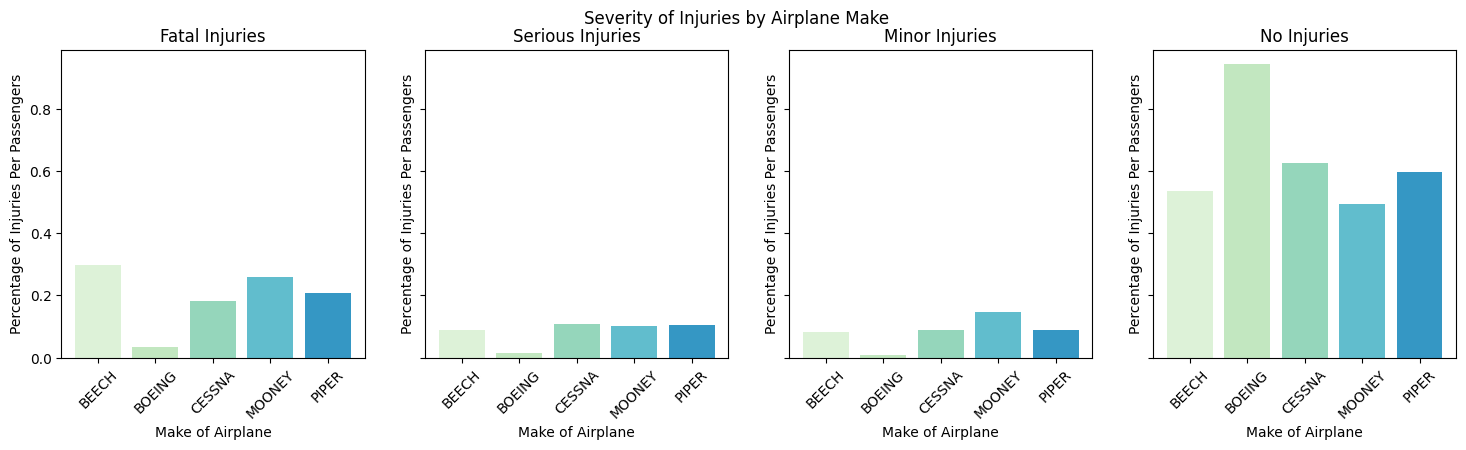

In [15]:
top5_injury_fig, top5_injury_axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 4), sharey=True)
top5_injury_axes[0].set_title('Fatal Injuries')
top5_injury_axes[0].set_ylabel('Percentage of Injuries Per Passengers')
top5_injury_axes[0].set_xlabel('Make of Airplane')

top5_injury_axes[1].set_title('Serious Injuries')
top5_injury_axes[1].set_ylabel('Percentage of Injuries Per Passengers')
top5_injury_axes[1].set_xlabel('Make of Airplane')

top5_injury_axes[2].set_title('Minor Injuries')
top5_injury_axes[2].set_ylabel('Percentage of Injuries Per Passengers')
top5_injury_axes[2].set_xlabel('Make of Airplane')

top5_injury_axes[3].set_title('No Injuries')
top5_injury_axes[3].set_ylabel('Percentage of Injuries Per Passengers')
top5_injury_axes[3].set_xlabel('Make of Airplane')

top5_injury_axes[0].bar(top5_injury.index, top5_injury['Total.Fatal.Injuries']/top5_injury['Total.Passengers'],color=sns.color_palette('GnBu'))
top5_injury_axes[1].bar(top5_injury.index, top5_injury['Total.Serious.Injuries']/top5_injury['Total.Passengers'],color=sns.color_palette('GnBu'))
top5_injury_axes[2].bar(top5_injury.index, top5_injury['Total.Minor.Injuries']/top5_injury['Total.Passengers'],color=sns.color_palette('GnBu'))
top5_injury_axes[3].bar(top5_injury.index, top5_injury['Total.Uninjured']/top5_injury['Total.Passengers'],color=sns.color_palette('GnBu'))

top5_injury_axes[0].set_xticklabels(top5_injury.index,rotation=45)
top5_injury_axes[1].set_xticklabels(top5_injury.index,rotation=45)
top5_injury_axes[2].set_xticklabels(top5_injury.index,rotation=45)
top5_injury_axes[3].set_xticklabels(top5_injury.index,rotation=45)

top5_injury_fig.suptitle('Severity of Injuries by Airplane Make')
plt.show()

In [16]:
top5_damage = aviationtop5.groupby(['Make','Aircraft.damage'])['Event.Id'].count()
Top5_Damage_Minor = top5_damage.xs('Minor', level='Aircraft.damage')
Top5_Damage_Destroyed = top5_damage.xs('Destroyed', level='Aircraft.damage')
Top5_Damage_Substantial = top5_damage.xs('Substantial', level='Aircraft.damage')

Top5_Damage_Total = pd.concat([Top5_Damage_Minor,Top5_Damage_Destroyed,Top5_Damage_Substantial],axis=1)
Top5_Damage_Total.columns = ['Minor','Destroyed','Substantial']
Top5_Damage_Total = Top5_Damage_Total.fillna(0)
Top5_Damage_Total['Total'] = Top5_Damage_Total['Minor'] + Top5_Damage_Total['Destroyed'] + Top5_Damage_Total['Substantial']
Top5_Damage_Total

,Minor,Destroyed,Substantial,Total
Make,,,,
BEECH,54,351,1332,1737
BOEING,344,60,329,733
CESSNA,115,1044,7225,8384
MOONEY,4,73,382,459
PIPER,70,676,3980,4726


<ipython-input-17-7809bae8d373>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  top5_damage_axes.set_xticklabels(Top5_Damage_Total.index,rotation=45)


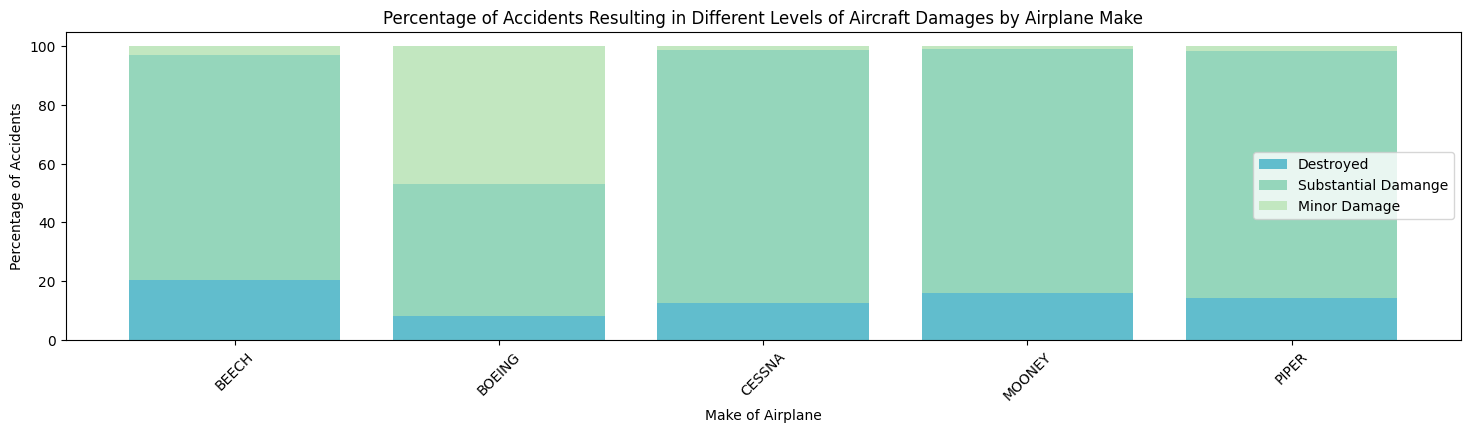

In [17]:
top5_damage_fig, top5_damage_axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))

top5_damage_axes.set_title('Percentage of Accidents Resulting in Different Levels of Aircraft Damages by Airplane Make')
top5_damage_axes.set_ylabel('Percentage of Accidents')
top5_damage_axes.set_xlabel('Make of Airplane')

Top5_DamageMinor = Top5_Damage_Total['Minor']/Top5_Damage_Total['Total']*100
Top5_DamageDestroyed = Top5_Damage_Total['Destroyed']/Top5_Damage_Total['Total']*100
Top5_DamageSubstantial = Top5_Damage_Total['Substantial']/Top5_Damage_Total['Total']*100

top5_damage_axes.bar(Top5_Damage_Total.index, Top5_DamageDestroyed,label='Destroyed',color=sns.color_palette('GnBu')[3])
top5_damage_axes.bar(Top5_Damage_Total.index, Top5_DamageSubstantial,bottom=Top5_DamageDestroyed,label='Substantial Damange',color=sns.color_palette('GnBu')[2])
top5_damage_axes.bar(Top5_Damage_Total.index, Top5_DamageMinor,bottom=np.array(Top5_DamageDestroyed) + np.array(Top5_DamageSubstantial),label='Minor Damage',color=sns.color_palette('GnBu')[1])

top5_damage_axes.set_xticklabels(Top5_Damage_Total.index,rotation=45)
top5_damage_axes.legend()

plt.show()

We also compared the outcome of accidents by engine type to see if the severity of injuries and aircraft damage is affected by the engine type.  While there are a few different engine types listed, a significant majority were either reciprocating or turbo engines, so we compared their outcomes.

In [18]:
#dropping any rows that do not have engine types listed or a number of passengers
enginetype = aviation
enginetype = enginetype.dropna(subset = ['Engine.Type'], inplace = False)
enginetype = enginetype[enginetype['Engine.Type'] != 'Unknown']
enginetype = enginetype[enginetype['Engine.Type'] != 'UNK']
enginetype = enginetype[enginetype['Total.Passengers'] != 0]
enginetype.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23027 entries, 5 to 90226
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                23027 non-null  object        
 1   Investigation.Type      23027 non-null  object        
 2   Event.Date              23027 non-null  datetime64[ns]
 3   Country                 23020 non-null  object        
 4   Injury.Severity         23027 non-null  object        
 5   Aircraft.damage         23027 non-null  object        
 6   Aircraft.Category       23027 non-null  object        
 7   Registration.Number     23009 non-null  object        
 8   Make                    23027 non-null  object        
 9   Model                   23010 non-null  object        
 10  Amateur.Built           23027 non-null  object        
 11  Number.of.Engines       23027 non-null  object        
 12  Engine.Type             23027 non-null  object     

In [19]:
enginetype.loc[enginetype['Engine.Type'].str.contains('Turbo', case=False),'Engine.Type']='Turbo'
enginetype['Engine.Type'].value_counts()

,count
Engine.Type,
Reciprocating,20685
Turbo,2341
Electric,1


In [20]:
enginetype = enginetype[enginetype['Engine.Type'] != 'Electric']
engine_type = enginetype.groupby('Engine.Type').agg({'Total.Passengers':'sum','Total.Fatal.Injuries':'sum','Total.Serious.Injuries':'sum','Total.Minor.Injuries':'sum','Total.Uninjured':'sum'})
engine_type

,Total.Passengers,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,,
Reciprocating,36722.0,6165.0,4427.0,3774.0,22356.0
Turbo,85735.0,2147.0,1399.0,795.0,81394.0


<ipython-input-21-044a3a294740>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  engine_type_axes[0].set_xticklabels(engine_type.index,rotation=45)
<ipython-input-21-044a3a294740>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  engine_type_axes[1].set_xticklabels(engine_type.index,rotation=45)


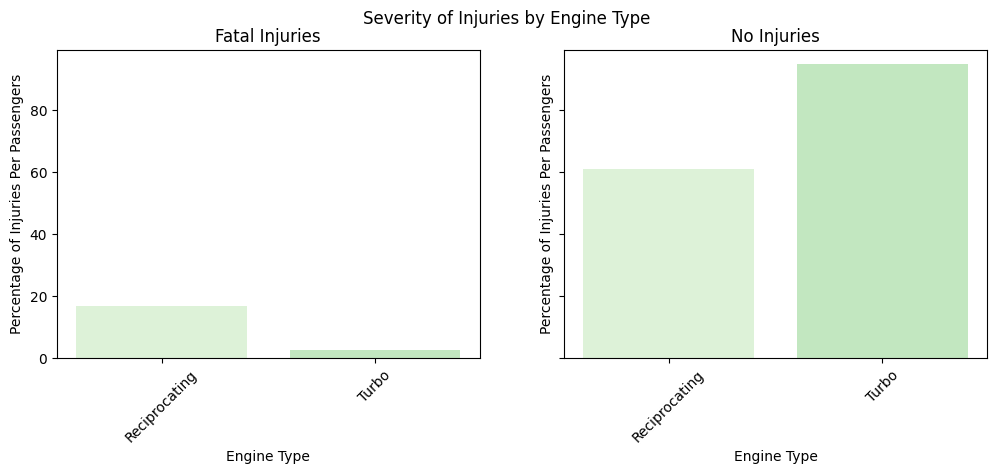

In [21]:
engine_type_fig, engine_type_axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)

engine_type_axes[0].set_title('Fatal Injuries')
engine_type_axes[0].set_ylabel('Percentage of Injuries Per Passengers')
engine_type_axes[0].set_xlabel('Engine Type')

#engine_type_axes[1].set_title('Serious Injuries')
#engine_type_axes[1].set_ylabel('Percentage of Injuries Per Passengers')
#engine_type_axes[1].set_xlabel('Engine Type')

#engine_type_axes[2].set_title('Minor Injuries')
#engine_type_axes[2].set_ylabel('Percentage of Injuries Per Passengers')
#engine_type_axes[2].set_xlabel('Engine Type')

engine_type_axes[1].set_title('No Injuries')
engine_type_axes[1].set_ylabel('Percentage of Injuries Per Passengers')
engine_type_axes[1].set_xlabel('Engine Type')

engine_type_axes[0].bar(engine_type.index, engine_type['Total.Fatal.Injuries']/engine_type['Total.Passengers']*100,color=sns.color_palette('GnBu'))
#engine_type_axes[1].bar(engine_type.index, engine_type['Total.Serious.Injuries']/engine_type['Total.Passengers'])
#engine_type_axes[2].bar(engine_type.index, engine_type['Total.Minor.Injuries']/engine_type['Total.Passengers'])
engine_type_axes[1].bar(engine_type.index, engine_type['Total.Uninjured']/engine_type['Total.Passengers']*100,color=sns.color_palette('GnBu'))

engine_type_axes[0].set_xticklabels(engine_type.index,rotation=45)
engine_type_axes[1].set_xticklabels(engine_type.index,rotation=45)

engine_type_fig.suptitle('Severity of Injuries by Engine Type')
plt.show()

In [22]:
Damage = enginetype.groupby(['Engine.Type','Aircraft.damage'])['Event.Id'].count()
Damage_Minor = Damage.xs('Minor', level='Aircraft.damage')
Damage_Destroyed = Damage.xs('Destroyed', level='Aircraft.damage')
Damage_Substantial = Damage.xs('Substantial', level='Aircraft.damage')

Damage_Total = pd.concat([Damage_Minor,Damage_Destroyed,Damage_Substantial],axis=1)
Damage_Total.columns = ['Minor','Destroyed','Substantial']
Damage_Total = Damage_Total.fillna(0)
Damage_Total['Total'] = Damage_Total['Minor'] + Damage_Total['Destroyed'] + Damage_Total['Substantial']
Damage_Total

,Minor,Destroyed,Substantial,Total
Engine.Type,,,,
Reciprocating,222,2343,18016,20581
Turbo,279,326,1367,1972


<ipython-input-23-fe899b5b5d4f>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  engine_type_axes.set_xticklabels(Damage_Total.index,rotation=45)


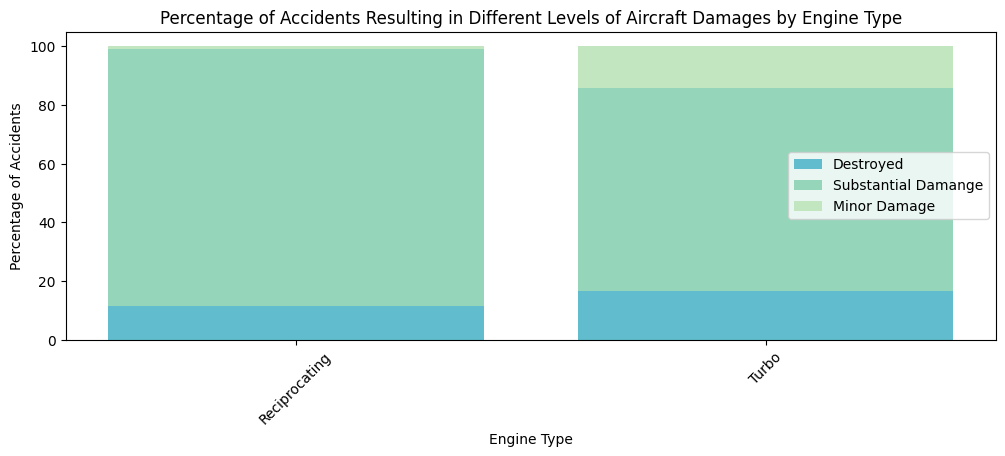

In [23]:
engine_type_fig, engine_type_axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

engine_type_axes.set_title('Percentage of Accidents Resulting in Different Levels of Aircraft Damages by Engine Type')
engine_type_axes.set_ylabel('Percentage of Accidents')
engine_type_axes.set_xlabel('Engine Type')

DamageMinor = Damage_Total['Minor']/Damage_Total['Total']*100
DamageDestroyed = Damage_Total['Destroyed']/Damage_Total['Total']*100
DamageSubstantial = Damage_Total['Substantial']/Damage_Total['Total']*100

engine_type_axes.bar(Damage_Total.index, DamageDestroyed,label='Destroyed',color=sns.color_palette('GnBu')[3])
engine_type_axes.bar(Damage_Total.index, DamageSubstantial,bottom=DamageDestroyed,label='Substantial Damange',color=sns.color_palette('GnBu')[2])
engine_type_axes.bar(Damage_Total.index, DamageMinor,bottom=np.array(DamageDestroyed) + np.array(DamageSubstantial),label='Minor Damage',color=sns.color_palette('GnBu')[1])

engine_type_axes.set_xticklabels(Damage_Total.index,rotation=45)
engine_type_axes.legend()

plt.show()

Finally, we analyzed the effect of oustide factor of weather on the accidents.  We investigated the time of year of the accidents and the state of visibility the planes were flying through at the time of the crash.

In [24]:
aviation['Event.Month'] = aviation['Event.Date'].dt.month
months = aviation['Event.Month'].value_counts().sort_index()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
months.index = month_names
months

,count
Jan,1513
Feb,1615
Mar,2054
Apr,2218
May,2661
Jun,2988
Jul,3327
Aug,3096
Sep,2720
Oct,2183


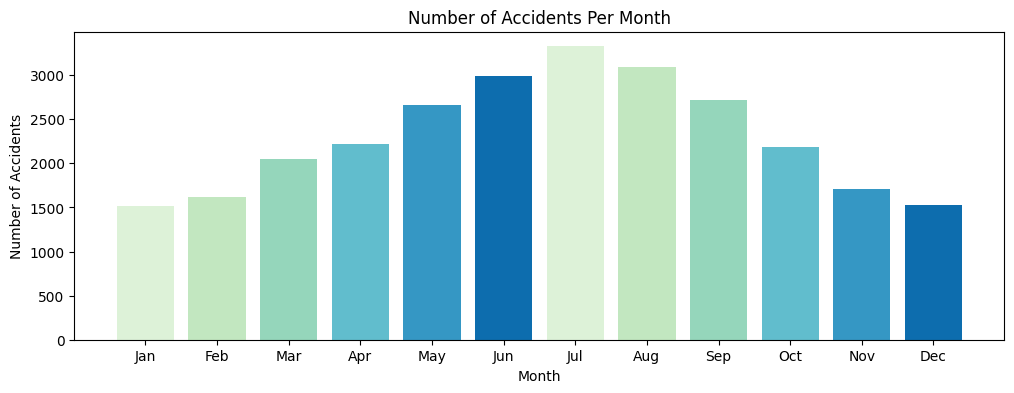

In [25]:
months_fig, months_axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

months_axes.set_title('Number of Accidents Per Month')
months_axes.set_ylabel('Number of Accidents')
months_axes.set_xlabel('Month')

months_axes.bar(months.index, months.values,color=sns.color_palette('GnBu'))

plt.show()

In [26]:
#dropping any rows that do not have weather listed
weather = aviation
weather = weather.dropna(subset = ['Weather.Condition'], inplace = False)
weather = weather[weather['Weather.Condition'] != 'Unk']
weather = weather[weather['Weather.Condition'] != 'UNK']
weather = weather[weather['Total.Passengers'] != 0]
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24104 entries, 5 to 90345
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                24104 non-null  object        
 1   Investigation.Type      24104 non-null  object        
 2   Event.Date              24104 non-null  datetime64[ns]
 3   Country                 24098 non-null  object        
 4   Injury.Severity         24104 non-null  object        
 5   Aircraft.damage         24104 non-null  object        
 6   Aircraft.Category       24104 non-null  object        
 7   Registration.Number     23991 non-null  object        
 8   Make                    24104 non-null  object        
 9   Model                   24083 non-null  object        
 10  Amateur.Built           24104 non-null  object        
 11  Number.of.Engines       24104 non-null  object        
 12  Engine.Type             22329 non-null  object     

In [27]:
weather['Weather.Condition'].value_counts()

,count
Weather.Condition,
VMC,22706
IMC,1398


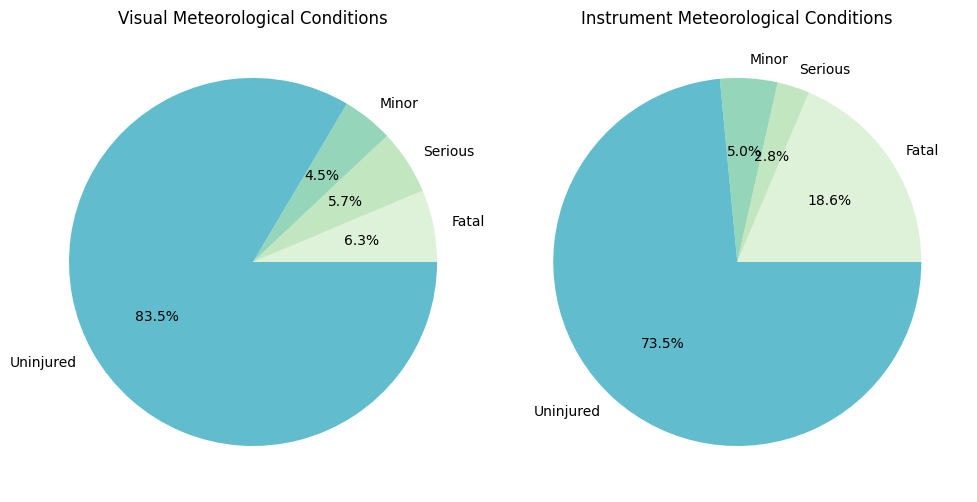

In [28]:
IMC = weather[weather['Weather.Condition'] == 'IMC']
VMC = weather[weather['Weather.Condition'] == 'VMC']

IMC_labels = ['Fatal','Serious','Minor','Uninjured']
IMC_values = [IMC['Total.Fatal.Injuries'].sum(),IMC['Total.Serious.Injuries'].sum(),IMC['Total.Minor.Injuries'].sum(),IMC['Total.Uninjured'].sum()]

VMC_labels = ['Fatal','Serious','Minor','Uninjured']
VMC_values = [VMC['Total.Fatal.Injuries'].sum(),VMC['Total.Serious.Injuries'].sum(),VMC['Total.Minor.Injuries'].sum(),VMC['Total.Uninjured'].sum()]

fig, (VMCPlot, IMCPlot) = plt.subplots(1, 2, figsize=(10, 5))

VMCPlot.pie(VMC_values,labels=VMC_labels,autopct='%1.1f%%',colors=sns.color_palette('GnBu'))
VMCPlot.set_title('Visual Meteorological Conditions')

IMCPlot.pie(IMC_values,labels=IMC_labels,autopct='%1.1f%%',colors=sns.color_palette('GnBu'))
IMCPlot.set_title('Instrument Meteorological Conditions')

plt.tight_layout()
plt.style.context('seaborn-darkgrid')
plt.show()

In [29]:
print(VMC_labels)
print(IMC_values)
print(VMC_values)

['Fatal', 'Serious', 'Minor', 'Uninjured']
[2835.0, 432.0, 768.0, 11182.0]
[6371.0, 5720.0, 4488.0, 84050.0]


In [30]:
aviationboeing = aviation[aviation['Make']=="BOEING"]
aviationboeing = aviationboeing.dropna(subset = ['Model'],inplace = False)
aviationboeing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1350 entries, 50 to 90236
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                1350 non-null   object        
 1   Investigation.Type      1350 non-null   object        
 2   Event.Date              1350 non-null   datetime64[ns]
 3   Country                 1350 non-null   object        
 4   Injury.Severity         923 non-null    object        
 5   Aircraft.damage         1350 non-null   object        
 6   Aircraft.Category       1350 non-null   object        
 7   Registration.Number     1292 non-null   object        
 8   Make                    1350 non-null   object        
 9   Model                   1350 non-null   object        
 10  Amateur.Built           1350 non-null   object        
 11  Number.of.Engines       1350 non-null   object        
 12  Engine.Type             557 non-null    object     

In [31]:
aviationboeing.loc[aviationboeing['Model'].str.contains('737'),'Model']='737'
aviationboeing['Model'].value_counts()

,count
Model,
737,630
777,76
747,68
767,60
757,42
...,...
767-432ER,1
MD,1
707-336,1


In [32]:
aviationboeing737 = aviationboeing[aviationboeing['Model'] == '737']
print(aviationboeing737['Total.Passengers'].sum())
print(aviationboeing737['Total.Uninjured'].sum())
print(aviationboeing737['Aircraft.damage'].value_counts())
print(aviationboeing737['Engine.Type'].value_counts())

41923.0
39077.0
Aircraft.damage
Unknown        342
Minor          161
Substantial    103
Destroyed       24
Name: count, dtype: int64
Engine.Type
Turbo Fan    135
Unknown       16
Turbo Jet     10
Name: count, dtype: int64


# Conclusion

With the opening of this new aviation division of our company, we have two goals. 1. Keep our great reputation as a company who cares for their customers and 2. Make a profit.  In order to reach both those goals, we need to keep our people safe and minimize any damage to our aircrafts.

This analysis leads to recommendations for success.  With the data that we have in hand to analyze, we have come to the following conclusions:

*   **Utilize planes with turbo engines** In accidents involving airplanes with reciprocating engines, nearly 40% of the passengers were injured, including 17% fatalities.  On the other hand, of the passengers who were in accidents while flying on an airplane with a turbo engine, only 5% were injured and 2.5% were killed.  Additionally, turbo engines are more likely have an accident with only minor damage to the airline
*   **Stay grounded when the weather is bad** When the pilots are able to see with their own eyes rather than relying on instruments to guide them, crashes are less likely to end in fatalities.  Almost 20% of passengers involved in a crash while the instruments were guiding the plane had fatal injuries.
*   **Fly Boeing**  For the safety of our passengers, Boeing is the favorite.  Of the nearly 97,000 passengers recorded to be involved in an accident on a Boeing aircraft, 94% of them were entirely unharmed.  The next best Make of airplane in terms of uninjured passengers in accidents is Cessna with just 63% arriving unscathed.  Boeing also has the greatest likelihood of minimal damage to the aircraft as the result of an accident.  47% of the Boeing aircrafts incured minimal damange, allowing the company to refrain from substantial repair costs.

## Limitations

For the entirety of this analysis, we have made one big assumption.  We assume that all airplanes have equal probabilities of being involved in accidents.  Our data only contained accident information and nothing on successful flights.  Therefore, our conclusions were based on the plan to keep the harm, both to passengers and the aircraft, to a minimum.

## Next Steps

Further analysis could help us develop the aviation division of our company even more:

*   **Add data regarding successful flights** With additional information on all flights, including those that are successful, we could analyze which planes are not only more likely to result in minimal injury and damage when an accidents occurs but also recommend planes that are less likely to be involved in an iccident at all.
*   **Model Cost Information** In order earn a profit in the aviation division, modeling the cost of each flight and the income resulting from each flight would be beneficial.

